# =========== Part 1: Loading and Visualizing Data =============

In [17]:
import numpy as np
import scipy.io as sio
import matplotlib.pylab as plt
import math

In [18]:
def displayData(x):
    width = round(math.sqrt(np.size(x, 1)))
    m, n = np.shape(x)
    height = int(n/width)
    # 显示图像的数量
    drows = math.floor(math.sqrt(m))
    dcols = math.ceil(m/drows)

    pad = 1
    # 建立一个空白“背景布”
    darray = -1*np.ones((pad+drows*(height+pad), pad+dcols*(width+pad)))

    curr_ex = 0
    for j in range(drows):
        for i in range(dcols):
            if curr_ex >= m:
                break
            max_val = np.max(np.abs(X[curr_ex, :]))
            darray[pad+j*(height+pad):pad+j*(height+pad)+height, pad+i*(width+pad):pad+i*(width+pad)+width]\
                = x[curr_ex, :].reshape((height, width))/max_val
            curr_ex += 1
        if curr_ex >= m:
            break

    plt.imshow(darray.T, cmap='gray')
    plt.show()

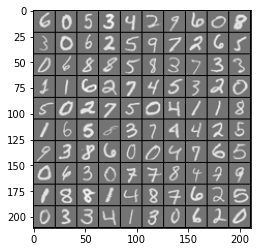

In [19]:
data = sio.loadmat('ex3/ex3data1.mat')
X = data['X']
y = data['y'][:, 0]
m = np.size(X, 0)

rand_indices = np.random.permutation(m)
sel = X[rand_indices[0:100], :]
displayData(sel)

# ================ Part 2: Loading Pameters ================

In [23]:
theta = sio.loadmat('ex3/ex3weights.mat')
theta1 = theta['Theta1']
theta2 = theta['Theta2']

# ================= Part 3: Implement Predict =================

In [38]:
def sigmoid(z):
    g = 1/(1+np.exp(-1*z))
    return g
def predict(t1, t2, x):
    m = np.size(x, 0)
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    temp1 = sigmoid(x.dot(theta1.T))
    temp = np.concatenate((np.ones((m, 1)), temp1), axis=1)
    temp2 = sigmoid(temp.dot(theta2.T))
    p = np.argmax(temp2, axis=1)+1
    return p

In [34]:
pred = predict(theta1, theta2, X)
print('Training Set Accuracy: ', np.sum(pred == y)/np.size(y, 0))

Training Set Accuracy:  0.9752


Displaying Example Image


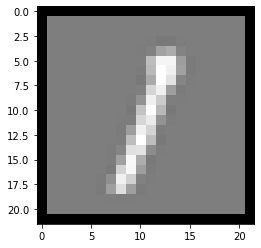

Neural Network Prediction: 1 (digit 1)
Displaying Example Image


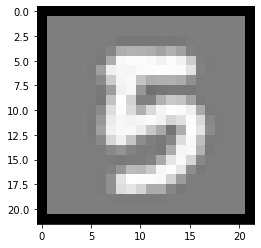

Neural Network Prediction: 5 (digit 5)
Displaying Example Image


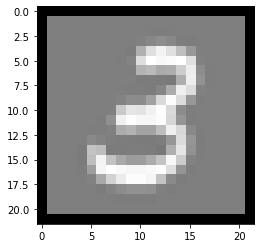

Neural Network Prediction: 3 (digit 3)
Displaying Example Image


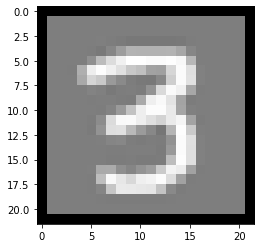

Neural Network Prediction: 3 (digit 3)
Displaying Example Image


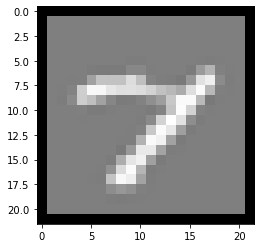

Neural Network Prediction: 7 (digit 7)
Displaying Example Image


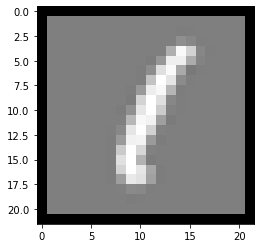

Neural Network Prediction: 1 (digit 1)
Displaying Example Image


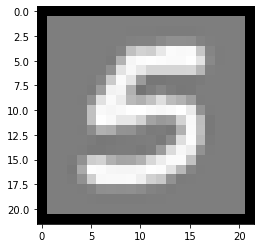

Neural Network Prediction: 5 (digit 5)
Displaying Example Image


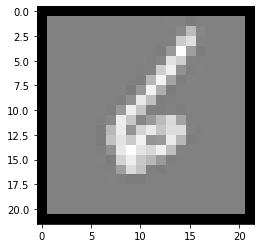

Neural Network Prediction: 6 (digit 6)
Displaying Example Image


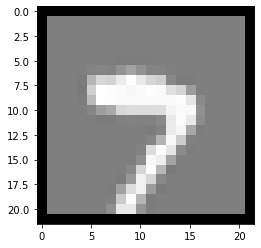

Neural Network Prediction: 7 (digit 7)
Displaying Example Image


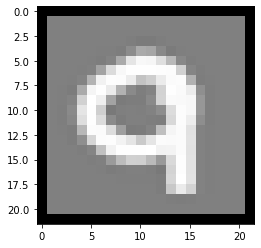

Neural Network Prediction: 9 (digit 9)


In [39]:
num = 10
rindex = np.random.permutation(m)
for i in range(num):
    print('Displaying Example Image')
    displayData(X[rindex[i]:rindex[i]+1, :])

    pred = predict(theta1, theta2, X[rindex[i]:rindex[i]+1, :])
    print('Neural Network Prediction: %d (digit %d)' % (pred, pred % 10))